**Goal:** Analyze Yammer data to identify why there is a dip in user engagement for their platform.


**About Yammer:** Yammer is a social network for communicating with coworkers. Individuals share documents, updates, and ideas by posting them in groups. Yammer is free to use indefinitely, but companies must pay license fees if they want access to administrative controls, including integration with user management systems like ActiveDirectory

**Probably reasons for the dip in engagment (Hypothesis)**
- Security issues (like a security bug happened)
- Switching to a different product (like a better and free product available)
- The product stopped working any more
- Updates happened after August (New features added that didn't work or caused certain features to stop working)
- Are the users coming from the same location/organization/country etc?
- Organizations changed the product
- Does Yammer changed their business model during that time?

**Recommendations**
- 
- 

In [406]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates

### Events

In [391]:
# Load and convert date time into weeks
event_df = pd.read_csv("data/yammer_events.csv")
event_df['occurred_at_period'] = pd.to_datetime(event_df['occurred_at'])
event_df['occurred_at_period'] = event_df['occurred_at_period'].dt.to_period(freq = 'W')
event_df['occurred_at_period_start_time'] = event_df.occurred_at_period.dt.start_time
event_df['occurred_at_period_end_time'] = event_df.occurred_at_period.dt.end_time
event_df.drop(['occurred_at_period', 'user_type'], axis=1, inplace=True)
event_df.head()

,user_id,occurred_at,event_type,event_name,location,device,occurred_at_period_start_time,occurred_at_period_end_time
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,2014-04-28,2014-05-04
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,2014-04-28,2014-05-04
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,2014-04-28,2014-05-04
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,2014-04-28,2014-05-04
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,2014-04-28,2014-05-04


### Users

In [392]:
users_df = pd.read_csv("data/yammer_users.csv", header=0, na_values='.')
users_df.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


### Rollup

In [393]:
roll_up_period = pd.read_csv("data/dimension_rollup_periods.csv")
roll_up_period['occurred_at_period_start_time'] = pd.to_datetime(roll_up_period['pst_start'])
roll_up_period.head()

,period_id,time_id,pst_start,pst_end,utc_start,utc_end,occurred_at_period_start_time
0,1.0,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-01 08:00:00,2013-01-02 08:00:00,2013-01-01
1,1.0,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-02 08:00:00,2013-01-03 08:00:00,2013-01-02
2,1.0,2013-01-03 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-03 08:00:00,2013-01-04 08:00:00,2013-01-03
3,1.0,2013-01-04 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-04 08:00:00,2013-01-05 08:00:00,2013-01-04
4,1.0,2013-01-05 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-05 08:00:00,2013-01-06 08:00:00,2013-01-05


## Merging Event and Users

In [394]:
event_users_df = pd.merge(event_df, users_df, on = "user_id", how="left")
event_users_df.head()

,user_id,occurred_at,event_type,event_name,location,device,occurred_at_period_start_time,occurred_at_period_end_time,created_at,company_id,language,activated_at,state
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,2014-04-28,2014-05-04,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,2014-04-28,2014-05-04,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,2014-04-28,2014-05-04,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,2014-04-28,2014-05-04,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,2014-04-28,2014-05-04,2014-04-04 16:48:03,1147.0,japanese,2014-04-04 16:49:36,active


In [561]:
# Keep only engaged for plotting
engaged = event_users_df[event_users_df.event_type == "engagement"]
engaged_group = engaged.groupby('occurred_at_period_start_time')['user_id'].nunique().to_frame().reset_index()
engaged_group.tail()
# engaged_group.sort_values(by = "user_id", ascending=False)

,occurred_at_period_start_time,user_id
13,2014-07-28,1443
14,2014-08-04,1266
15,2014-08-11,1215
16,2014-08-18,1203
17,2014-08-25,1194


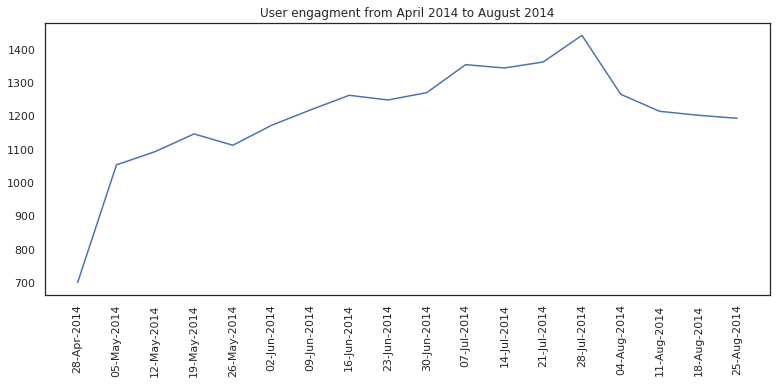

In [467]:
# Plotting
fig = plt.subplots(1,1, figsize = (13, 5))
ax = sns.lineplot(data=engaged_group, x="occurred_at_period_start_time", y="user_id")
ax.set(xticks=engaged_group.occurred_at_period_start_time.values);
ax.xaxis.set_major_formatter(dates.DateFormatter("%d-%b-%Y"));
plt.xticks(rotation=90);
plt.xlabel("");
plt.ylabel("");
plt.title("User engagment from April 2014 to August 2014");

So it looks like the drop in user engagement happend after **28-Jul-2014**. Why? What could be the possible reasons?

In [449]:
# Filtering dataframes
event_before_dip = event_users_df[(event_users_df['occurred_at_period_start_time'] <= '2014-07-28')]
event_after_dip = event_users_df[(event_users_df['occurred_at_period_start_time'] > '2014-07-28')]

In [504]:
# Checking the total number of unique users
full = event_users_df[event_users_df.event_type == "engagement"]
print("Number of unique users in the full dataset:", len(full['user_id'].unique()))

before = event_before_dip[event_before_dip.event_type == "engagement"]
nunique_before = before['user_id'].unique()
print("Number of unique users before dip:", len(nunique_before))

after = event_after_dip[event_after_dip.event_type == "engagement"]
nunique_after = after['user_id'].unique()
print("Number of unique users after dip:", len(nunique_after))


len(list(set(nunique_before) - set(nunique_after)))

Number of unique users in the full dataset: 6142
Number of unique users before dip: 5089
Number of unique users after dip: 2649


3493

In [542]:
dropped = [i for i in nunique_before if i not in nunique_after]
dropped_df = pd.DataFrame(sorted(dropped[1:10]))
dropped_df.columns = ["user_id"]

In [625]:
dropped_users_df = pd.merge(event_users_df, dropped_df, on="user_id", how="right")
dropped_users_df.head()
dropped_users_df.shape

,user_id,occurred_at,event_type,event_name,location,device,occurred_at_period_start_time,occurred_at_period_end_time,created_at,company_id,language,activated_at,state
0,10736.0,2014-05-09 17:52:45,engagement,login,Austria,iphone 4s,2014-05-05,2014-05-11,2014-04-09 09:37:56,1532.0,german,2014-04-09 09:39:20,active
1,10736.0,2014-05-09 17:53:16,engagement,like_message,Austria,iphone 4s,2014-05-05,2014-05-11,2014-04-09 09:37:56,1532.0,german,2014-04-09 09:39:20,active
2,10736.0,2014-05-09 17:53:51,engagement,send_message,Austria,iphone 4s,2014-05-05,2014-05-11,2014-04-09 09:37:56,1532.0,german,2014-04-09 09:39:20,active
3,10736.0,2014-05-21 09:31:26,engagement,login,Austria,iphone 4s,2014-05-19,2014-05-25,2014-04-09 09:37:56,1532.0,german,2014-04-09 09:39:20,active
4,10736.0,2014-05-21 09:31:56,engagement,view_inbox,Austria,iphone 4s,2014-05-19,2014-05-25,2014-04-09 09:37:56,1532.0,german,2014-04-09 09:39:20,active


(324, 13)

,,user,location,users
user_id,location,,,
10736.0,Austria,NaN,56,NaN
10965.0,Finland,NaN,2,NaN
11020.0,Japan,NaN,78,NaN
11037.0,United Kingdom,NaN,31,NaN
11133.0,India,NaN,8,NaN
11194.0,United States,NaN,7,NaN
11212.0,France,NaN,29,NaN
11215.0,Iran,NaN,2,NaN
11231.0,United States,NaN,111,NaN


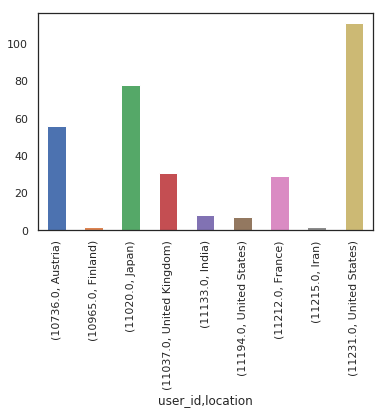

In [644]:
cols = ["user", "location", "users"]
x = dropped_users_df.groupby('user_id')['location'].value_counts()
pd.DataFrame(x, columns = cols)

dropped_users_df.groupby('user_id')['location'].value_counts().plot(kind = "bar")

In [443]:
# Plotting
fig = plt.subplots(1,1, figsize = (13, 5))
ax = sns.lineplot(data=event_before_dip, x="occurred_at_period_start_time", y="user_id")
ax.set(xticks=engaged_group.occurred_at_period_start_time.values);
ax.xaxis.set_major_formatter(dates.DateFormatter("%d-%b-%Y"));
plt.xticks(rotation=90);
plt.xlabel("");
plt.ylabel("");
plt.title("User engagment from April 2014 to August 2014");

United States     74259
Japan             20434
Germany           18479
France            14244
United Kingdom    13286
Russia             9668
Italy              9178
Brazil             8901
India              7846
Canada             7622
                  ...  
Singapore          1177
Hong Kong          1165
Argentina          1110
Iraq               1081
Philippines        1038
Portugal            958
Chile               796
Pakistan            731
Greece              724
Ireland             719
Name: location, Length: 47, dtype: int64

In [ ]:
engaged = event_users_df[event_users_df.event_type == "engagement"]
engaged_group = engaged.groupby('occurred_at_period_start_time')['user_id'].nunique().to_frame().reset_index()
